In [1]:
import tensorflow as tf #Check version
import numpy as np
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

2022-11-15 15:38:35.214714: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 15:38:35.309639: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-15 15:38:35.313478: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 15:38:35.313488: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])

2022-11-15 15:38:47.491640: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 15:38:47.491665: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 15:38:47.491684: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (crumblerworm): /proc/driver/nvidia/version does not exist
2022-11-15 15:38:47.491925: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
history = model.fit(x_train, y_train,
                  validation_data=(x_test, y_test), 
                  epochs=10)

results = model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4863 - acc: 0.8246 - val_loss: 0.4612 - val_acc: 0.8325
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3694 - acc: 0.8658 - val_loss: 0.3804 - val_acc: 0.8608
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3319 - acc: 0.8775 - val_loss: 0.3615 - val_acc: 0.8705
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3073 - acc: 0.8871 - val_loss: 0.3456 - val_acc: 0.8799
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2916 - acc: 0.8928 - val_loss: 0.3515 - val_acc: 0.8793
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2759 - acc: 0.8969 - val_loss: 0.3567 - val_acc: 0.8733
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2636 - acc: 0.9010 - val_loss: 0.3486 - val_acc: 0.8768
Epoch 8/10
1875/1875 [==============================] - 5s 3ms

Accuracy of model prediction: 0.8809999823570251


Text(0, 0.5, 'Loss')

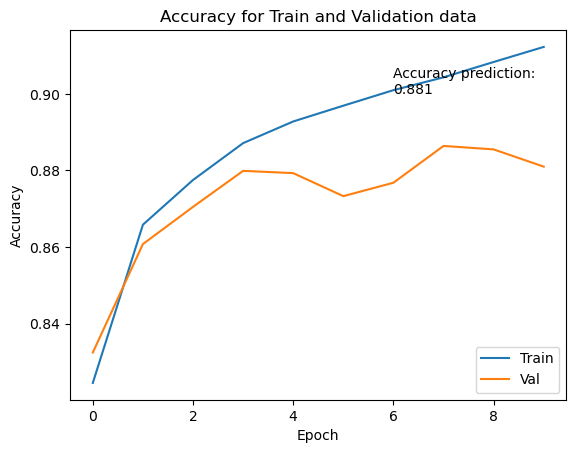

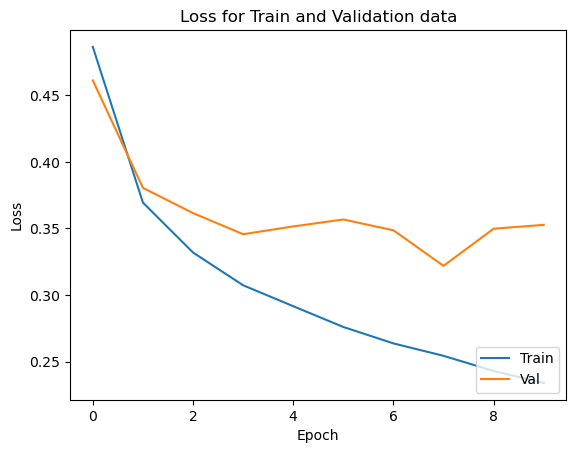

In [5]:
#Model accuracy
print('Accuracy of model prediction:',results[1])

fig0, ax0 = plt.subplots()
ax0.plot(history.history['acc'],
         label='Train')
ax0.plot(history.history['val_acc'],
         label='Val')
ax0.set_title('Accuracy for Train and Validation data')
ax0.legend(loc='lower right')
ax0.set_xlabel('Epoch')
ax0.set_ylabel('Accuracy')
ax0.text(6,0.90,'Accuracy prediction: \n%s'%round(results[1],4))

fig1, ax1 = plt.subplots()
ax1.plot(history.history['loss'],
         label='Train')
ax1.plot(history.history['val_loss'],
         label='Val')
ax1.set_title('Loss for Train and Validation data')
ax1.legend(loc='lower right')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

I am going to assess the impact of hidden layers on the performance of the model by designing five different Deep Neural Networks comprising of hidden layers ranging from 1 to 5 respectively, while keeping the neurons count fixed as 50 for each hidden layer.

In [6]:
# Load dataset 
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


# Define the model and hiden layers
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])

# Fit and evaluate the model
history = model.fit(x_train, y_train,
                   validation_data=(x_test, y_test), 
                   epochs=5)

results = model.evaluate(x_test, y_test)

#Model accuracy
print('Accuracy of model prediction:',results[1])


Epoch 1/5
1875/1875 [==============================] - 2s 975us/step - loss: 0.5311 - acc: 0.8083 - val_loss: 0.4379 - val_acc: 0.8426
Epoch 2/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.3900 - acc: 0.8579 - val_loss: 0.4035 - val_acc: 0.8532
Epoch 3/5
1875/1875 [==============================] - 2s 973us/step - loss: 0.3510 - acc: 0.8710 - val_loss: 0.4160 - val_acc: 0.8488
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3341 - acc: 0.8771 - val_loss: 0.3859 - val_acc: 0.8601
Epoch 5/5
313/313 [==============================] - 0s 717us/step - loss: 0.3688 - acc: 0.8680
Accuracy of model prediction: 0.8679999709129333


Text(0, 0.5, 'Loss')

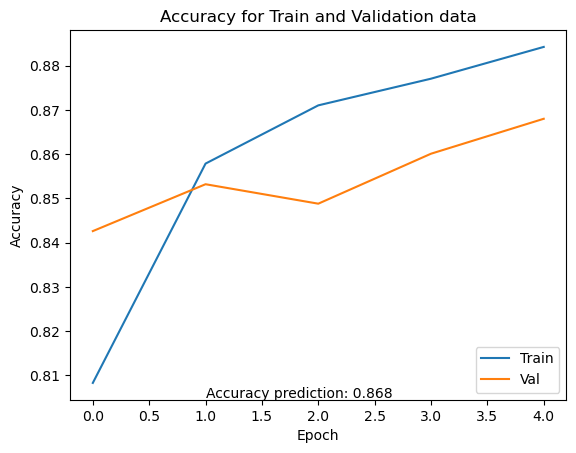

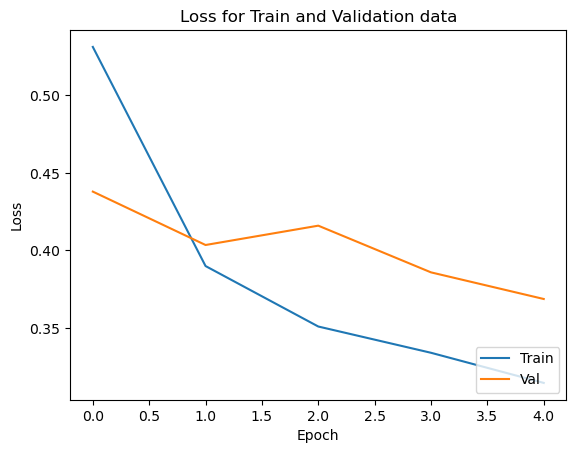

In [7]:
# Figures
fig2, ax2 = plt.subplots()
ax2.plot(history.history['acc'],
         label='Train')
ax2.plot(history.history['val_acc'],
         label='Val')
ax2.set_title('Accuracy for Train and Validation data')
ax2.legend(loc='lower right')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.text(1,0.805,'Accuracy prediction: %s'%round(results[1],4))

fig3, ax3 = plt.subplots()
ax3.plot(history.history['loss'],
         label='Train')
ax3.plot(history.history['val_loss'],
         label='Val')
ax3.set_title('Loss for Train and Validation data')
ax3.legend(loc='lower right')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')


The total accuracy for the first model architecture is higher, but the acutal preformance of the hidden layers is lower. Looking at the graphs for the 1st architecture, there is a wide gap between the training data and the validation data. Using the second architecture yeilds a better preformance graph, showing a better preformance of the hidden layers.

Now using the better architecture I assess the impact of neurons count in the last hidden layer over the model performance by testing differnt neurons count from the set {20, 40, 60, 80, 100}. 

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5005 - acc: 0.8175 - val_loss: 0.4510 - val_acc: 0.8345
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3721 - acc: 0.8634 - val_loss: 0.3962 - val_acc: 0.8552
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3347 - acc: 0.8765 - val_loss: 0.4043 - val_acc: 0.8488
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3109 - acc: 0.8868 - val_loss: 0.3724 - val_acc: 0.8714
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2911 - acc: 0.8924 - val_loss: 0.3589 - val_acc: 0.8709
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2758 - acc: 0.8970 - val_loss: 0.3291 - val_acc: 0.8849
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2650 - acc: 0.9000 - val_loss: 0.3552 - val_acc: 0.8754
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

Text(0, 0.5, 'Loss')

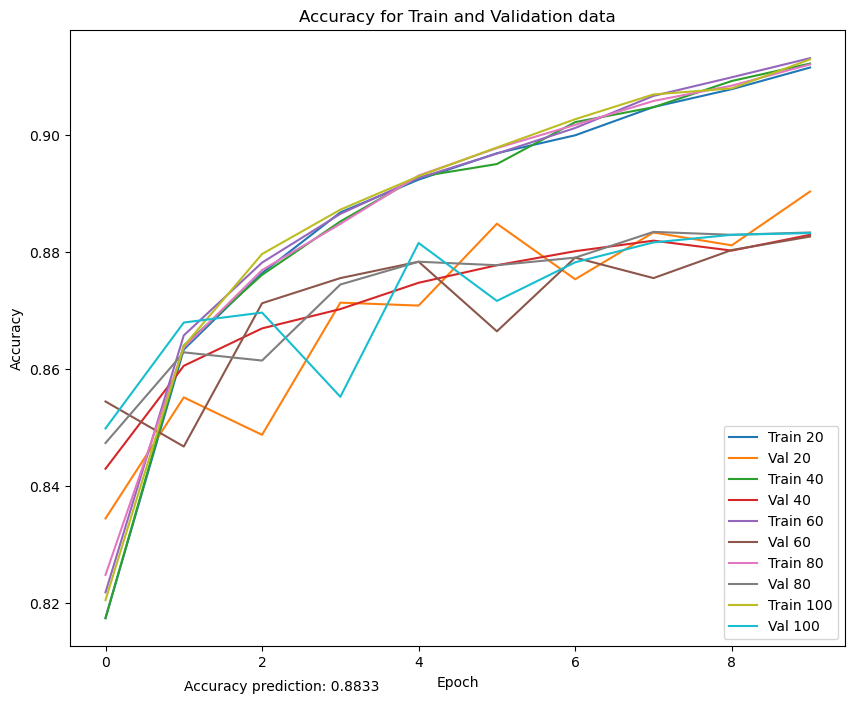

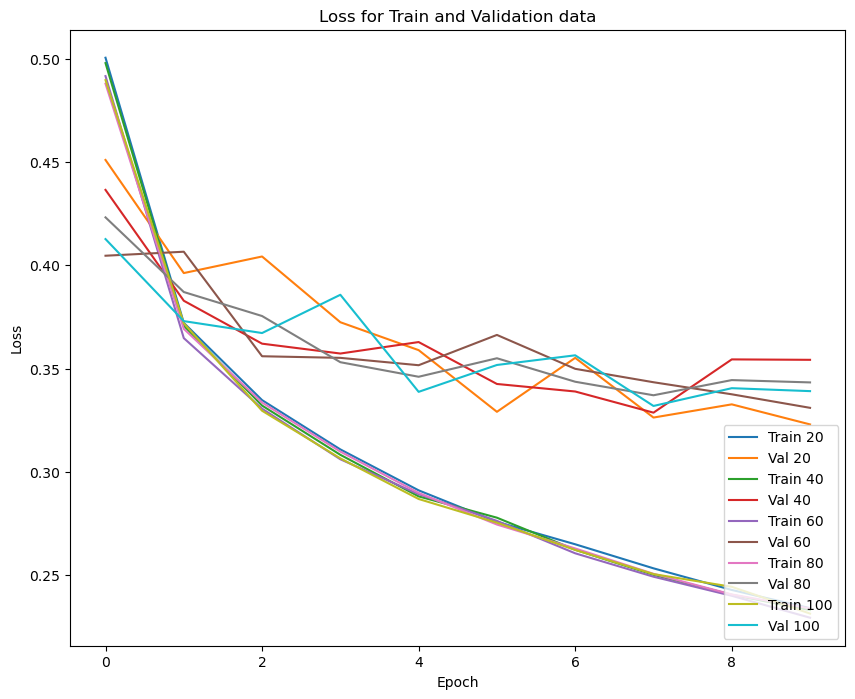

In [8]:
# Load dataset 
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

iter = 0
neurons = [20, 40, 60, 80, 100]
fig, ax = plt.subplots(figsize=(10,8))
fig1, ax1 = plt.subplots(figsize=(10,8))

for neuron in neurons:
  iter=+1
  # Define the model and hiden layers
  model = Sequential([
      Flatten(input_shape=(28, 28)),
      Dense(512, activation='relu'),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(neuron, activation='relu'),
      Dense(10, activation='softmax')
  ])

  # Compile the model
  model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])


  # Fit and evaluate the model
  history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test), 
                    epochs=10)

  results = model.evaluate(x_test, y_test)

  #Model accuracy
  print('Accuracy of model prediction:',results[1])
  # plots(history, iter, results)
  ax.plot(history.history['acc'],
          label='Train %s'%neuron)
  ax.plot(history.history['val_acc'],
          label='Val %s'%neuron)
  ax1.plot(history.history['loss'],
          label='Train %s'%neuron)
  ax1.plot(history.history['val_loss'],
          label='Val %s'%neuron)

# Plot 1 parameters
ax.set_title('Accuracy for Train and Validation data')
ax.legend(loc='lower right')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.text(1,0.805,'Accuracy prediction: %s'%round(results[1],4))

# Plot 2 parameters
ax1.set_title('Loss for Train and Validation data')
ax1.legend(loc='lower right')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

Running a loop through the different neuron list, using the 1st model architecture, we can see how the different neurons in the last layer have effected the preformance. The total accuracy for neuron 40 preformed the best, with an accuracy score of 89%. The preformance graph, in general, for all the sampled neurons has improved over the previous model architecture.